Importing plotly failed. Interactive plots will not work.
00:13:42 - cmdstanpy - INFO - Chain [1] start processing
00:13:43 - cmdstanpy - INFO - Chain [1] done processing
/home/ihor/MLcourse/timeseries/.venv/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/ihor/MLcourse/timeseries/.venv/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


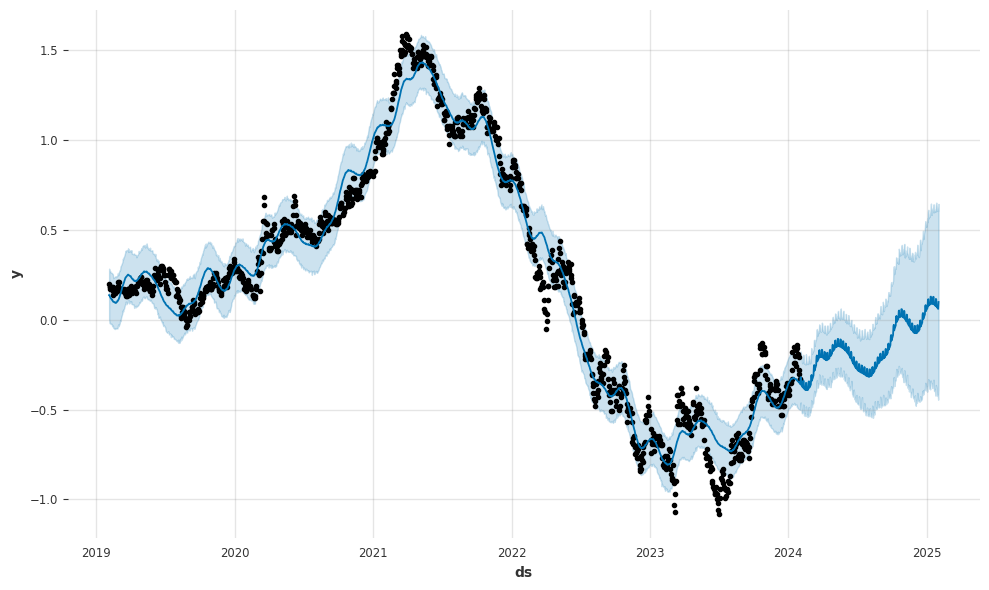

In [43]:
from prophet import Prophet
import pandas as pd

# Загрузка данных
data = pd.read_csv('T10Y2Y.csv')

# Преобразование данных в формат, подходящий для Prophet
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.rename(columns={'DATE': 'ds', 'T10Y2Y': 'y'})
data['y'] = pd.to_numeric(data['y'].replace('.', 'NaN'), errors='coerce')
data = data.dropna()

# Инициализация и обучение модели
m = Prophet()
m.fit(data)

# Создание датафрейма для прогноза
future = m.make_future_dataframe(periods=365)

# Получение прогноза
forecast = m.predict(future)

# Визуализация результатов
fig1 = m.plot(forecast)
